In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('treadmil-users.csv')
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [4]:
#EXPLORATORY DATA ANALYSIS

In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
# Uni-Variate Analysis

In [8]:
cols = df.columns
cols

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [9]:
df['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [10]:
for i in cols:
    print(i,'-->',df[i].unique())

Product --> ['TM195' 'TM498' 'TM798']
Age --> [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Gender --> ['Male' 'Female']
Education --> [14 15 12 13 16 18 20 21]
MaritalStatus --> ['Single' 'Partnered']
Usage --> [3 2 4 5 6 7]
Fitness --> [4 3 2 1 5]
Income --> [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles --> [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


In [12]:
df.apply(lambda x:x.unique(),axis=0)

Product                                      [TM195, TM498, TM798]
Age              [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...
Gender                                              [Male, Female]
Education                         [14, 15, 12, 13, 16, 18, 20, 21]
MaritalStatus                                  [Single, Partnered]
Usage                                           [3, 2, 4, 5, 6, 7]
Fitness                                            [4, 3, 2, 1, 5]
Income           [29562, 31836, 30699, 32973, 35247, 37521, 363...
Miles            [112, 75, 66, 85, 47, 141, 103, 94, 113, 38, 1...
dtype: object

In [19]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [20]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [21]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [22]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [23]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [27]:
df['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
47     2
45     2
44     1
46     1
18     1
43     1
42     1
41     1
39     1
36     1
50     1
Name: Age, dtype: int64

<AxesSubplot:>

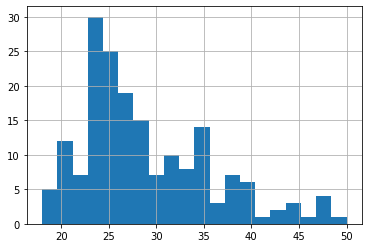

In [34]:
df['Age'].hist(bins=20)

<AxesSubplot:ylabel='Density'>

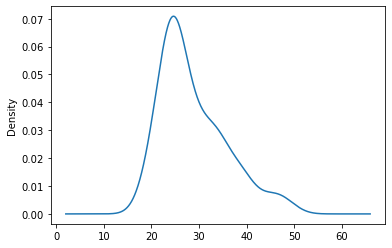

In [35]:
df['Age'].plot.kde()

In [36]:
#GroupBy

In [40]:
df.groupby('Product').describe().T

Product                 TM195         TM498          TM798
Age       count     80.000000     60.000000      40.000000
          mean      28.550000     28.900000      29.100000
          std        7.221452      6.645248       6.971738
          min       18.000000     19.000000      22.000000
          25%       23.000000     24.000000      24.750000
          50%       26.000000     26.000000      27.000000
          75%       33.000000     33.250000      30.250000
          max       50.000000     48.000000      48.000000
Education count     80.000000     60.000000      40.000000
          mean      15.037500     15.116667      17.325000
          std        1.216383      1.222552       1.639066
          min       12.000000     12.000000      14.000000
          25%       14.000000     14.000000      16.000000
          50%       16.000000     16.000000      18.000000
          75%       16.000000     16.000000      18.000000
          max       18.000000     18.000000      21.000000
Usage     count     80.000000     60.000000      40.000000
          mean       3.087500      3.066667       4.775000
          std        0.782624      0.799717       0.946993
          min        2.000000      2.000000       3.000000
          25%        3.000000      3.000000       4.000000
          50%        3.000000      3.000000       5.000000
          75%        4.000000      3.250000       5.000000
          max        5.000000      5.000000       7.000000
Fitness   count     80.000000     60.000000      40.000000
          mean       2.962500      2.900000       4.625000
          std        0.664540      0.629770       0.667467
          min        1.000000      1.000000       3.000000
          25%        3.000000      3.000000       4.000000
          50%        3.000000      3.000000       5.000000
          75%        3.000000      3.000000       5.000000
          max        5.000000      4.000000       5.000000
Income    count     80.000000     60.000000      40.000000
          mean   46418.025000  48973.650000   75441.575000
          std     9075.783190   8653.989388   18505.836720
          min    29562.000000  31836.000000   48556.000000
          25%    38658.000000  44911.500000   58204.750000
          50%    46617.000000  49459.500000   76568.500000
          75%    53439.000000  53439.000000   90886.000000
          max    68220.000000  67083.000000  104581.000000
Miles     count     80.000000     60.000000      40.000000
          mean      82.787500     87.933333     166.900000
          std       28.874102     33.263135      60.066544
          min       38.000000     21.000000      80.000000
          25%       66.000000     64.000000     120.000000
          50%       85.000000     85.000000     160.000000
          75%       94.000000    106.000000     200.000000
          max      188.000000    212.000000     360.000000

In [42]:
#OBSERVATION
#1.Age -> No significant differance seen
#2.Education -> 195 & 498 users are graduates and 798 users are post graduates
#3.Usage -> 195 & 498 users use upto 3 hrs where as 798 users use up to 4.7 hrs
#4.Fitness -> 198 & 498 rates 3 and 798 rates above 4.5
#5.Income -> 198 & 498 earns around 50000 whereas 798 earns around 75000
#6.Miles -> 198 & 498 covers about 80-90 whereas 798 covers about 165+

In [44]:
df.groupby('MaritalStatus').describe().T

MaritalStatus        Partnered        Single
Age       count     107.000000     73.000000
          mean       29.887850     27.178082
          std         7.250670      6.167438
          min        19.000000     18.000000
          25%        25.000000     23.000000
          50%        28.000000     25.000000
          75%        34.500000     31.000000
          max        50.000000     45.000000
Education count     107.000000     73.000000
          mean       15.663551     15.438356
          std         1.523055      1.747906
          min        12.000000     12.000000
          25%        14.000000     14.000000
          50%        16.000000     16.000000
          75%        16.000000     16.000000
          max        21.000000     21.000000
Usage     count     107.000000     73.000000
          mean        3.448598      3.465753
          std         1.159324      0.972999
          min         2.000000      2.000000
          25%         3.000000      3.000000
          50%         3.000000      3.000000
          75%         4.000000      4.000000
          max         7.000000      6.000000
Fitness   count     107.000000     73.000000
          mean        3.271028      3.369863
          std         0.967101      0.950246
          min         1.000000      1.000000
          25%         3.000000      3.000000
          50%         3.000000      3.000000
          75%         4.000000      4.000000
          max         5.000000      5.000000
Income    count     107.000000     73.000000
          mean    55763.000000  50724.424658
          std     17499.657580  14534.129778
          min     30699.000000  29562.000000
          25%     45480.000000  40932.000000
          50%     52302.000000  48658.000000
          75%     61202.000000  54576.000000
          max    104581.000000  92131.000000
Miles     count     107.000000     73.000000
          mean      104.289720    101.589041
          std        59.230762     38.959678
          min        38.000000     21.000000
          25%        66.000000     75.000000
          50%        85.000000     95.000000
          75%       120.000000    113.000000
          max       360.000000    200.000000

In [51]:
#OBSERVATION
#1.Age -> No significant differance seen
#2.Education ->  No significant differance seen
#3.Usage ->  No significant differance seen
#4.Fitness ->  No significant differance seen
#5.Income ->  No significant differance seen
#6.Miles ->  No significant differance seen

In [45]:
df.groupby('Gender').describe().T

Gender                 Female           Male
Age       count     76.000000     104.000000
          mean      28.565789      28.951923
          std        6.342104       7.377978
          min       19.000000      18.000000
          25%       24.000000      23.750000
          50%       26.500000      26.000000
          75%       33.000000      34.000000
          max       50.000000      48.000000
Education count     76.000000     104.000000
          mean      15.394737      15.701923
          std        1.442950       1.728571
          min       13.000000      12.000000
          25%       14.000000      14.000000
          50%       16.000000      16.000000
          75%       16.000000      16.000000
          max       21.000000      21.000000
Usage     count     76.000000     104.000000
          mean       3.184211       3.653846
          std        1.016012       1.095172
          min        2.000000       2.000000
          25%        2.000000       3.000000
          50%        3.000000       4.000000
          75%        4.000000       4.000000
          max        6.000000       7.000000
Fitness   count     76.000000     104.000000
          mean       3.026316       3.519231
          std        0.832245       0.994946
          min        1.000000       1.000000
          25%        3.000000       3.000000
          50%        3.000000       3.000000
          75%        3.000000       4.000000
          max        5.000000       5.000000
Income    count     76.000000     104.000000
          mean   49828.907895   56562.759615
          std    12557.690428   18421.687779
          min    30699.000000   29562.000000
          25%    42921.750000   45480.000000
          50%    47754.000000   52302.000000
          75%    53796.000000   61611.250000
          max    95866.000000  104581.000000
Miles     count     76.000000     104.000000
          mean      90.013158     112.826923
          std       44.782882      54.702451
          min       21.000000      42.000000
          25%       66.000000      85.000000
          50%       85.000000     100.000000
          75%      100.000000     141.000000
          max      280.000000     360.000000

In [ ]:
#OBSERVATION
#1.Age -> No significant differance seen
#2.Education ->  No significant differance seen
#3.Usage -> No significant differance seen
#4.Fitness -> No significant differance seen
#5.Income -> An increase in males income can be noticed
#6.Miles ->  An increase in males miles count can be noticed

In [48]:
df.groupby('Fitness').describe().T

Fitness                     1             2             3              4  \
Age       count      2.000000     26.000000     97.000000      24.000000   
          mean      27.000000     28.269231     28.752577      28.333333   
          std        5.656854      6.885101      7.059318       6.531973   
          min       23.000000     20.000000     19.000000      18.000000   
          25%       25.000000     23.250000     23.000000      25.000000   
          50%       27.000000     25.500000     26.000000      26.000000   
          75%       29.000000     32.500000     33.000000      32.250000   
          max       31.000000     46.000000     50.000000      44.000000   
Education count      2.000000     26.000000     97.000000      24.000000   
          mean      17.000000     14.730769     15.237113      15.791667   
          std        1.414214      1.218448      1.359942       1.933215   
          min       16.000000     12.000000     12.000000      13.000000   
          25%       16.500000     14.000000     14.000000      14.000000   
          50%       17.000000     14.000000     16.000000      16.000000   
          75%       17.500000     16.000000     16.000000      16.500000   
          max       18.000000     16.000000     21.000000      21.000000   
Usage     count      2.000000     26.000000     97.000000      24.000000   
          mean       2.500000      2.538462      3.164948       3.916667   
          std        0.707107      0.646886      0.745548       0.928611   
          min        2.000000      2.000000      2.000000       3.000000   
          25%        2.250000      2.000000      3.000000       3.000000   
          50%        2.500000      2.000000      3.000000       4.000000   
          75%        2.750000      3.000000      4.000000       5.000000   
          max        3.000000      4.000000      5.000000       6.000000   
Income    count      2.000000     26.000000     97.000000      24.000000   
          mean   51939.000000  46179.692308  48853.494845   54995.291667   
          std    18782.170322   7825.183406  10342.367699   18304.281660   
          min    38658.000000  32973.000000  30699.000000   29562.000000   
          25%    45298.500000  40932.000000  40932.000000   44058.750000   
          50%    51939.000000  45480.000000  48891.000000   49459.500000   
          75%    58579.500000  53154.750000  54576.000000   59905.750000   
          max    65220.000000  60261.000000  88396.000000  103336.000000   
Miles     count      2.000000     26.000000     97.000000      24.000000   
          mean      34.000000     51.692308     87.185567     131.625000   
          std       18.384776     11.824616     19.203586      37.623781   
          min       21.000000     38.000000     53.000000      74.000000   
          25%       27.500000     43.250000     75.000000     106.000000   
          50%       34.000000     47.000000     85.000000     127.000000   
          75%       40.500000     53.000000     95.000000     160.000000   
          max       47.000000     85.000000    170.000000     212.000000   

Fitness                      5  
Age       count      31.000000  
          mean       29.806452  
          std         7.295749  
          min        22.000000  
          25%        24.000000  
          50%        28.000000  
          75%        33.500000  
          max        48.000000  
Education count      31.000000  
          mean       17.064516  
          std         1.436094  
          min        14.000000  
          25%        16.000000  
          50%        16.000000  
          75%        18.000000  
          max        21.000000  
Usage     count      31.000000  
          mean        4.838710  
          std         1.003221  
          min         3.000000  
          25%         4.000000  
          50%         5.000000  
          75%         5.500000  
          max         7.000000  
Income    count      31.000000  
          mean    74396.7

In [50]:
df.groupby('Education').describe().T

Education                12            13            14            15  \
Age     count      3.000000      5.000000     55.000000      5.000000   
        mean      25.333333     25.600000     25.654545     23.600000   
        std        9.291573      5.683309      4.448130      5.983310   
        min       19.000000     20.000000     18.000000     19.000000   
        25%       20.000000     21.000000     23.000000     21.000000   
        50%       21.000000     24.000000     25.000000     21.000000   
        75%       28.500000     30.000000     28.000000     23.000000   
        max       36.000000     33.000000     38.000000     34.000000   
Usage   count      3.000000      5.000000     55.000000      5.000000   
        mean       3.000000      3.600000      3.036364      2.800000   
        std        1.000000      0.547723      0.942095      1.303840   
        min        2.000000      3.000000      2.000000      2.000000   
        25%        2.500000      3.000000      2.000000      2.000000   
        50%        3.000000      4.000000      3.000000      2.000000   
        75%        3.500000      4.000000      3.000000      3.000000   
        max        4.000000      4.000000      7.000000      5.000000   
Fitness count      3.000000      5.000000     55.000000      5.000000   
        mean       2.666667      2.800000      2.981818      3.000000   
        std        0.577350      0.836660      0.652372      0.707107   
        min        2.000000      2.000000      2.000000      2.000000   
        25%        2.500000      2.000000      3.000000      3.000000   
        50%        3.000000      3.000000      3.000000      3.000000   
        75%        3.000000      3.000000      3.000000      3.000000   
        max        3.000000      4.000000      5.000000      4.000000   
Income  count      3.000000      5.000000     55.000000      5.000000   
        mean   36763.000000  42069.000000  44825.709091  41159.400000   
        std     6564.472561   8355.209513   9215.956305  14635.977019   
        min    32973.000000  32973.000000  29562.000000  31836.000000   
        25%    32973.000000  35247.000000  38658.000000  34110.000000   
        50%    32973.000000  42069.000000  45480.000000  35247.000000   
        75%    38658.000000  46617.000000  48891.000000  37521.000000   
        max    44343.000000  53439.000000  85906.000000  67083.000000   
Miles   count      3.000000      5.000000     55.000000      5.000000   
        mean      77.333333     91.000000     90.236364     84.800000   
        std       21.548395     50.926418     43.494556     36.894444   
        min       53.000000     47.000000     38.000000     38.000000   
        25%       69.000000     47.000000     60.000000     75.000000   
        50%       85.000000     85.000000     85.000000     85.000000   
        75%       89.500000    106.000000    106.000000     85.000000   
        max       94.000000    170.000000    300.000000    141.000000   

Education                16             18       20            21  
Age     count     85.000000      23.000000      1.0      3.000000  
        mean      30.894118      30.652174     25.0     31.000000  
        std        7.416236       7.158013      NaN      7.810250  
        min       21.000000      22.000000     25.0     26.000000  
        25%       25.000000      25.000000     25.0     26.500000  
        50%       29.000000      29.000000     25.0     27.000000  
        75%       35.000000      33.000000     25.0     33.500000  
        max       50.000000      48.000000     25.0     40.000000  
Usage   count     85.000000      23.000000      1.0      3.000000  
        mean       3.423529       4.565217      4.0      4.666667  
        std        0.930648       1.199473      NaN      1.154701  
        min        2.000000       2.000000      4.0      4.000000  
        25%        3.000000       4.000000      4.0      4.000000  
        50%        3.000000       5.000000      4.0   

In [52]:
#Generation of Graph

In [53]:
import matplotlib.pyplot as plt

0

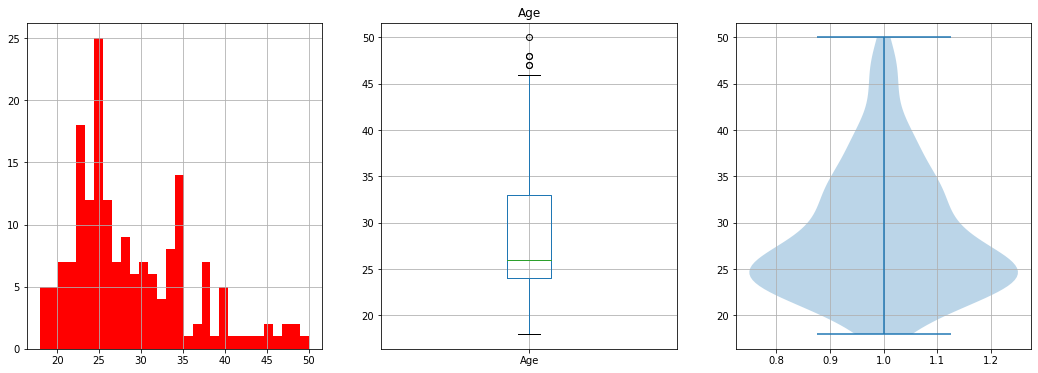

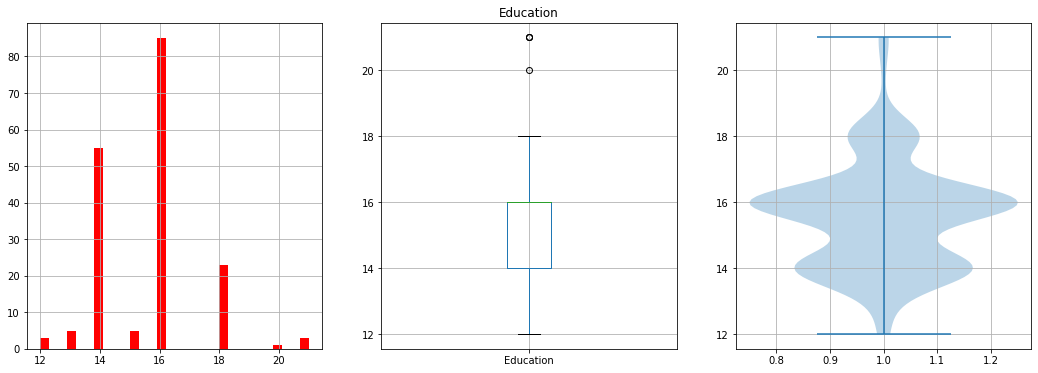

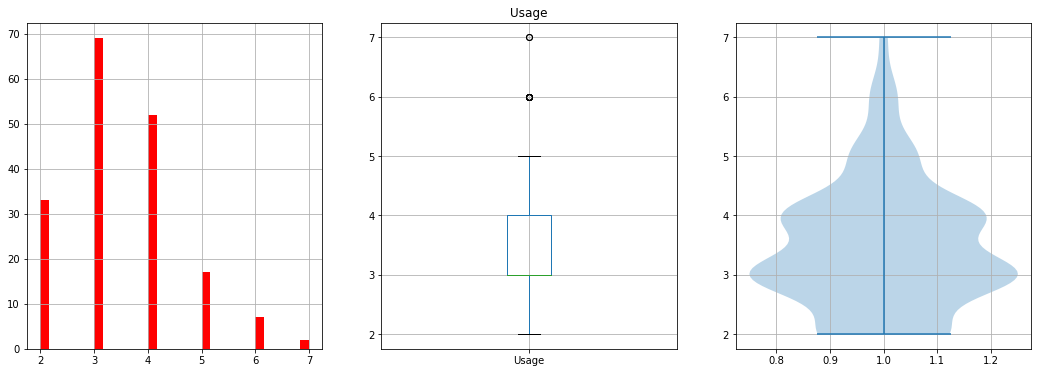

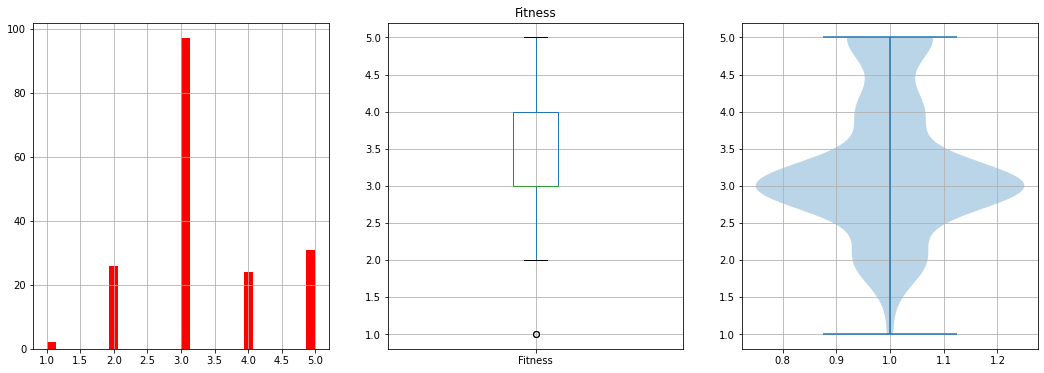

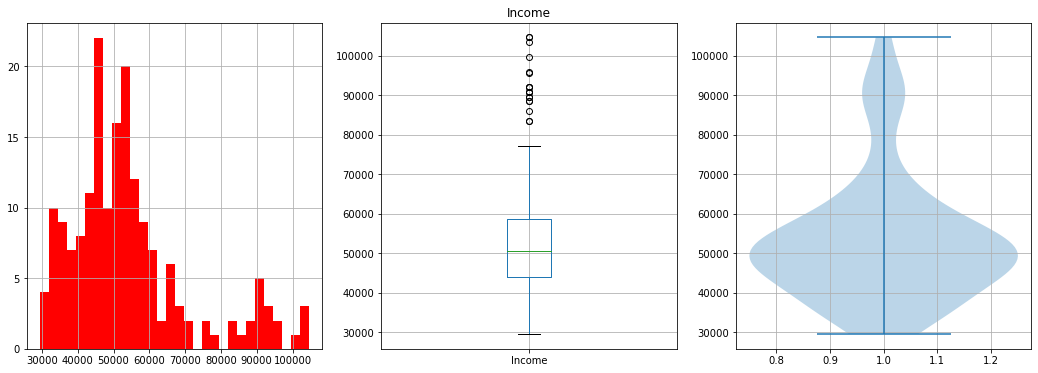

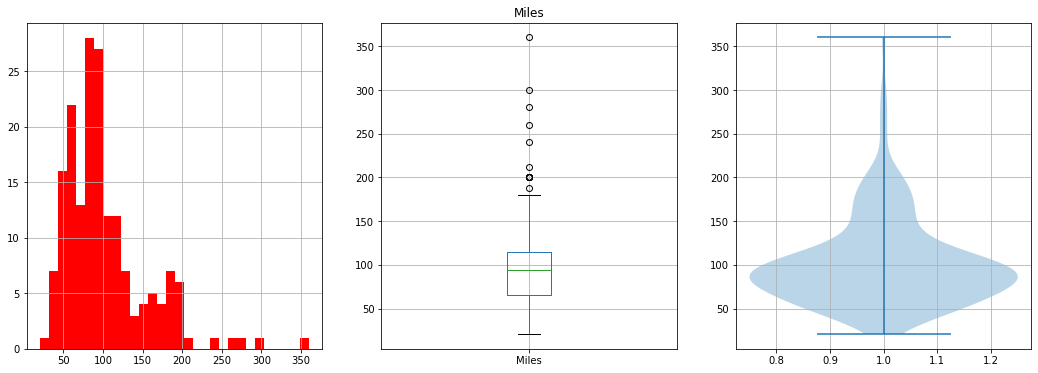

In [67]:
for i in ['Age','Education','Usage','Fitness','Income','Miles']:
 plt.figure(figsize=(18,6))
 plt.subplot(1,3,1)
 plt.hist(df[i],bins=30,color='red')
 plt.grid()

 plt.subplot(1,3,2)
 df[i].plot.box()
 plt.grid()
 plt.title(i)
    
 plt.subplot(1,3,3)
 plt.violinplot(df[i])
 plt.grid()
0

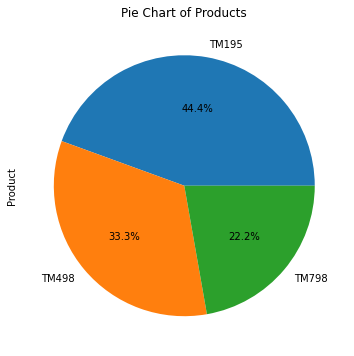

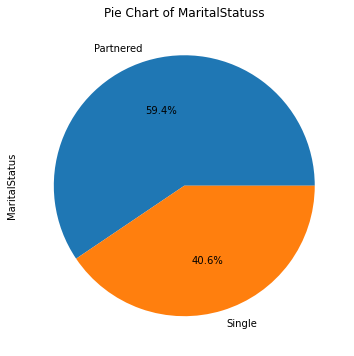

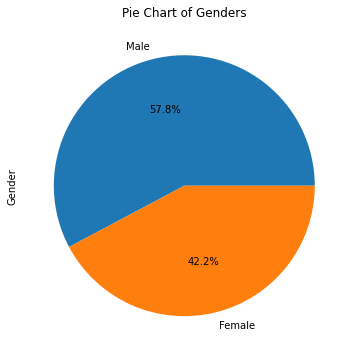

In [79]:
for i in ['Product','MaritalStatus','Gender']:
  df[i].value_counts().plot.pie(autopct='%.1f%%',figsize=(6,6))
  plt.title('Pie Chart of {}s'.format(i))
  plt.show()

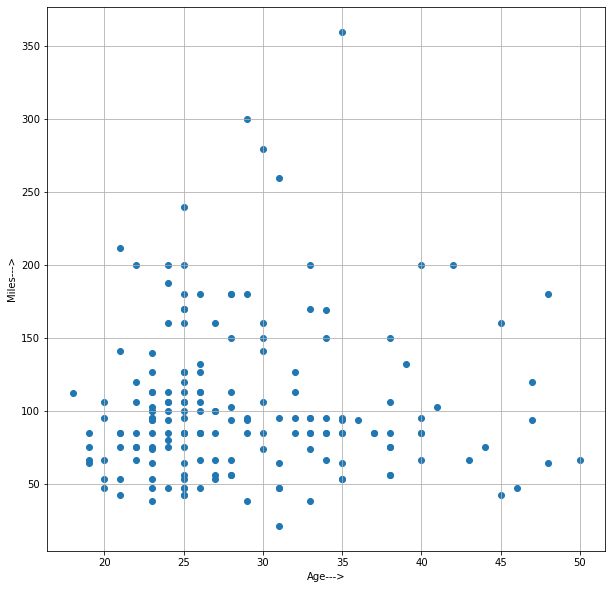

In [83]:
plt.figure(figsize=(10,10))
plt.scatter(df['Age'],df['Miles'])
plt.xlabel("Age--->")
plt.ylabel("Miles--->")
plt.grid()

In [84]:
df.groupby('Product')['Gender'].count()

Product
TM195    80
TM498    60
TM798    40
Name: Gender, dtype: int64

In [86]:
df.groupby('Product')['Gender'].value_counts()

Product  Gender
TM195    Female    40
         Male      40
TM498    Male      31
         Female    29
TM798    Male      33
         Female     7
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Product,Gender'>

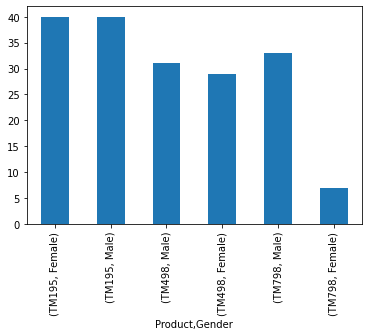

In [88]:
df.groupby('Product')['Gender'].value_counts().plot.bar()

In [87]:
pd.crosstab(df['Product'],df['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


<AxesSubplot:xlabel='Product'>

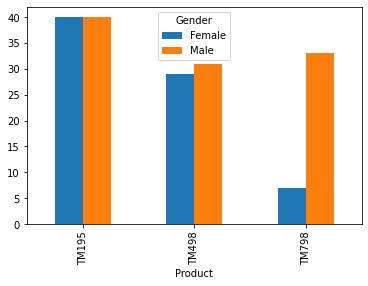

In [89]:
pd.crosstab(df['Product'],df['Gender']).plot.bar()

In [90]:
pd.crosstab(df['Product'],df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


<AxesSubplot:xlabel='Product'>

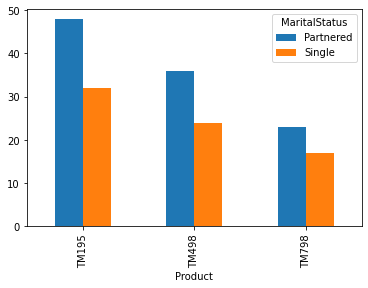

In [91]:
pd.crosstab(df['Product'],df['MaritalStatus']).plot.bar()